# Health Insurance Costs

In this example, we use a <a href="https://www.kaggle.com/mirichoi0218/insurance">dataset of personal medical costs</a> to create a model to estimate treatment costs. You can download the Jupyter notebook <a href="insurance.ipynb">here</a>.
    
The columns provided include:
<ul class="ul_content">
<li> age: age of the primary beneficiary </li>
<li> sex: insurance contractor's gender </li>
<li> bmi: body mass index </li>
<li> children: number of dependent children covered by health insurance </li>
<li> smoker: smoker on non-smoker </li>
<li> region: the beneficiary's residential area in the US: northeast, southeast, southwest, northwest. </li>
<li> charges: individual medical costs billed by health insurance </li>
</ul>

## Initialization

This example uses the following version of VerticaPy:

In [1]:
import verticapy as vp
vp.__version__

'1.0.1'

Connect to Vertica. This example uses an existing connection called "VerticaDSN." For details on how to create a connection, use see the <a href="https://www.vertica.com/python/documentation/1.0.x/html/connection.html">connection tutorial</a>.

You can skip the below cell if you already have an established connection.

In [2]:
vp.connect("VerticaDSN")

Let's  create a new schema and assign the data to a vDataFrame object.

The table "insurance"."insurance" has been successfully created.


,123ageInteger,AbcsexVarchar(20),123bmiNumeric(10),123childrenInteger,010smokerBoolean,AbcregionVarchar(20),123chargesFloat(22)
1,18,female,20.79,0,❌,southeast,1607.5101
2,18,female,21.66,0,✅,northeast,14283.4594
3,18,female,24.09,1,❌,southeast,2201.0971
4,18,female,25.08,0,❌,northeast,2196.4732
5,18,female,26.315,0,❌,northeast,2198.18985
6,18,female,26.73,0,❌,southeast,1615.7667
7,18,female,27.28,3,✅,southeast,18223.4512
8,18,female,28.215,0,❌,northeast,2200.83085
9,18,female,29.165,0,❌,northeast,7323.734819
10,18,female,30.115,0,❌,northeast,2203.47185

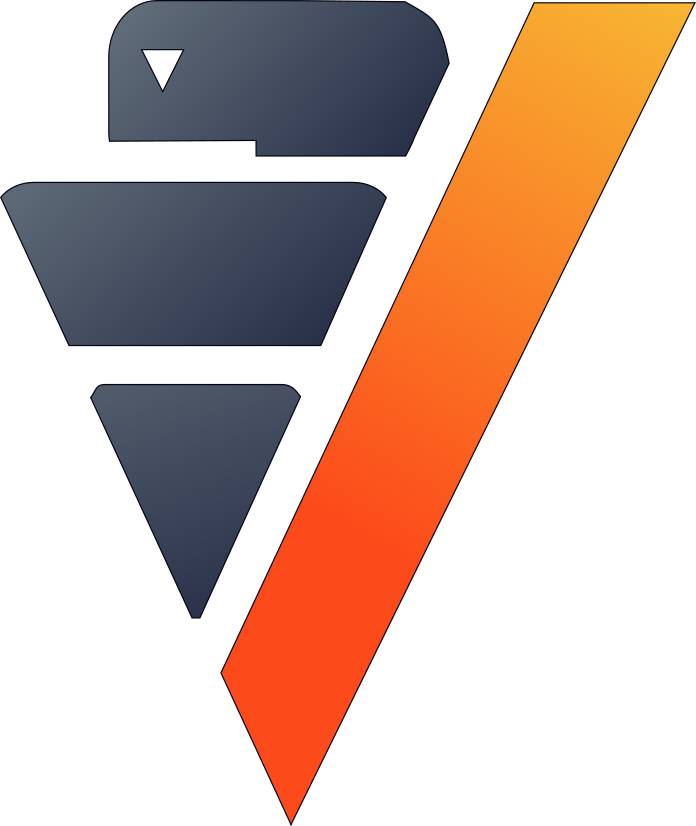

In [2]:
vp.drop("insurance", method="schema")
vp.create_schema("insurance")
data = vp.read_csv('insurance.csv', schema = 'insurance')
display(data)

Let's take a look at the first few entries in the dataset.

,123ageInteger,AbcsexVarchar(20),123bmiNumeric(10),123childrenInteger,010smokerBoolean,AbcregionVarchar(20),123chargesFloat(22)
1,18,female,20.79,0,❌,southeast,1607.5101
2,18,female,21.66,0,✅,northeast,14283.4594
3,18,female,24.09,1,❌,southeast,2201.0971
4,18,female,25.08,0,❌,northeast,2196.4732
5,18,female,26.315,0,❌,northeast,2198.18985

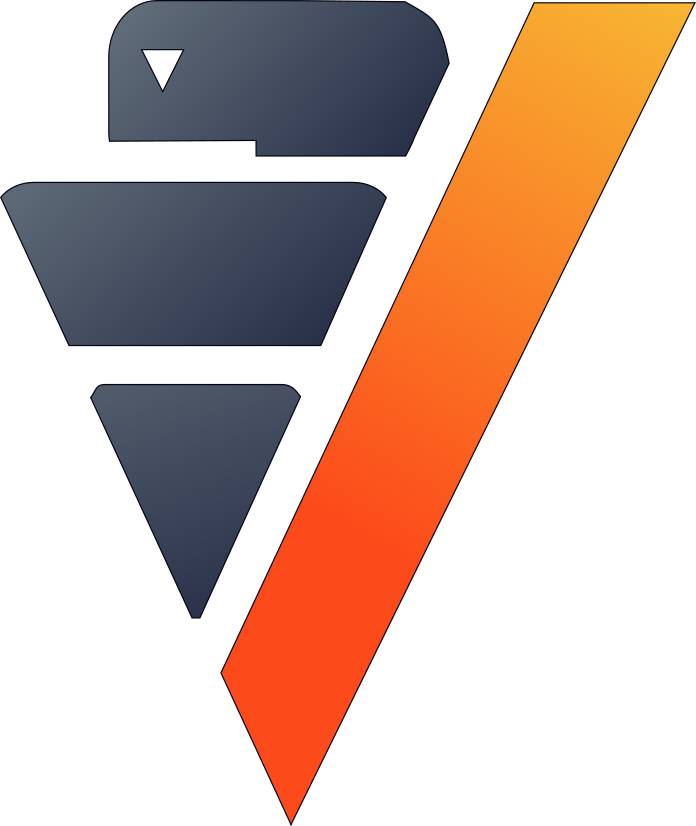

In [3]:
# returns the first five rows
data.head(5)

## Data exploration

Let's check our dataset for missing values. If we find any, we'll have to impute them before we create any models.

,count,percent
"""age""",1338.0,100.0
"""sex""",1338.0,100.0
"""bmi""",1338.0,100.0
"""children""",1338.0,100.0
"""smoker""",1338.0,100.0
"""region""",1338.0,100.0
"""charges""",1338.0,100.0

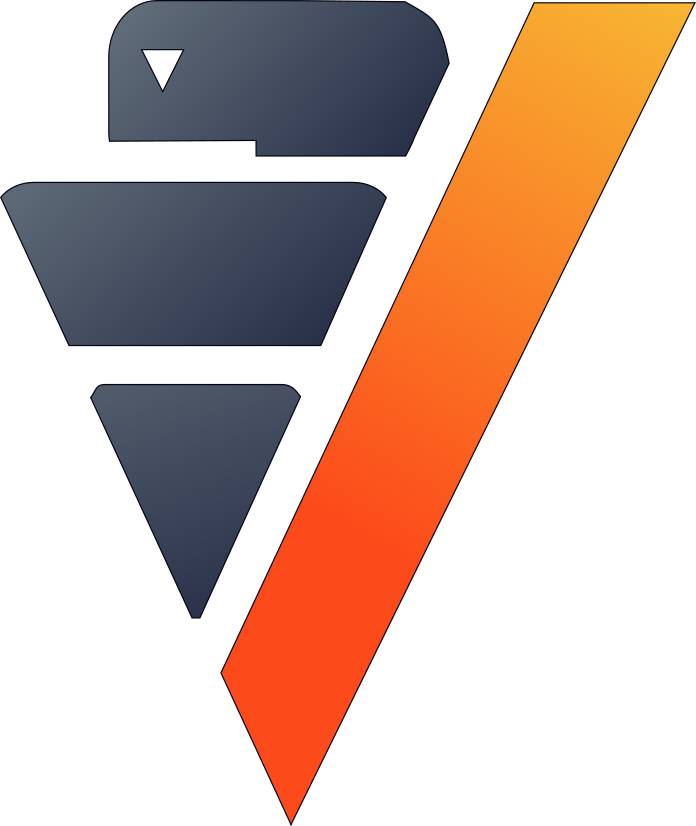

In [4]:
# count the number of non-null entries per column 
data.count_percent()

There aren't missing any values, so let's get a summary of the features.

,"123""age""Int100%","123""bmi""Numeric(8,4)100%","123""children""Int100%","010""smoker""Boolean100%","123""charges""Float100%","Abc""sex""Varchar(20)100%","Abc""region""Varchar(20)100%"
dtype,int,"numeric(8,4)",int,boolean,float,varchar(20),varchar(20)
percent,100,100,100,100,100,100,100
count,1338,1338,1338,1338,1338,1338,1338
top,18,32.3,0,❌,1639.5631,male,southeast
top_percent,5.157,0.972,42.9,79.522,0.149,50.523,27.205
avg,39.2070254110613,30.6633968609865,1.0949177877429,0.204783258594918,13270.4222651413,4.98953662182362,9.0
stddev,14.0499603792162,6.09818691167901,1.20549273978191,0.403694037545617,12110.011236694,1.00031913856875,0.0
min,18,15.96,0,0,1121.8739,4,9
approx_25%,27.0,26.29625,0.0,0.0,4740.28715,4,9
approx_50%,39.0,30.4,1.0,0.0,9379.1847,4,9

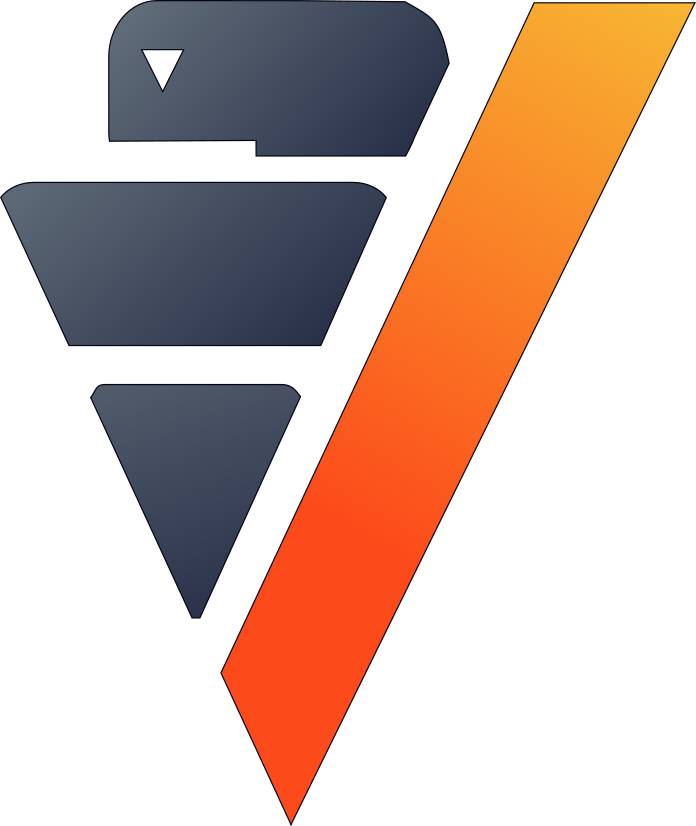

In [5]:
# returns summary data of each feature
data.describe(method='all')

The dataset covers 1338 individuals up to age 64 from four different regions, each with up to six dependent children.

We might find some interesting patterns if we check age distribution, so let's create a histogram.

In [6]:
# histogram of age
data["age"].hist(method = "count", h = 1)

We have a pretty obvious trend here: the 18 and 19 year old age groups are significantly more frequent than any other, older age group. The other ages range from 20 to 30 people.

Before we do anything else, let's discretize the age column using equal-width binning with a width of 5. Our goal is to see if there are any obvious patterns among the different age groups.

,AbcageVarchar100%,AbcsexVarchar(20)100%,"123bmiNumeric(8,4)100%",123childrenInt100%,010smokerBoolean100%,AbcregionVarchar(20)100%,123chargesFloat100%
1,[15;19],female,20.79,0,❌,southeast,1607.5101
2,[15;19],female,21.66,0,✅,northeast,14283.4594
3,[15;19],female,24.09,1,❌,southeast,2201.0971
4,[15;19],female,25.08,0,❌,northeast,2196.4732
5,[15;19],female,26.315,0,❌,northeast,2198.18985
6,[15;19],female,26.73,0,❌,southeast,1615.7667
7,[15;19],female,27.28,3,✅,southeast,18223.4512
8,[15;19],female,28.215,0,❌,northeast,2200.83085
9,[15;19],female,29.165,0,❌,northeast,7323.734819
10,[15;19],female,30.115,0,❌,northeast,2203.47185

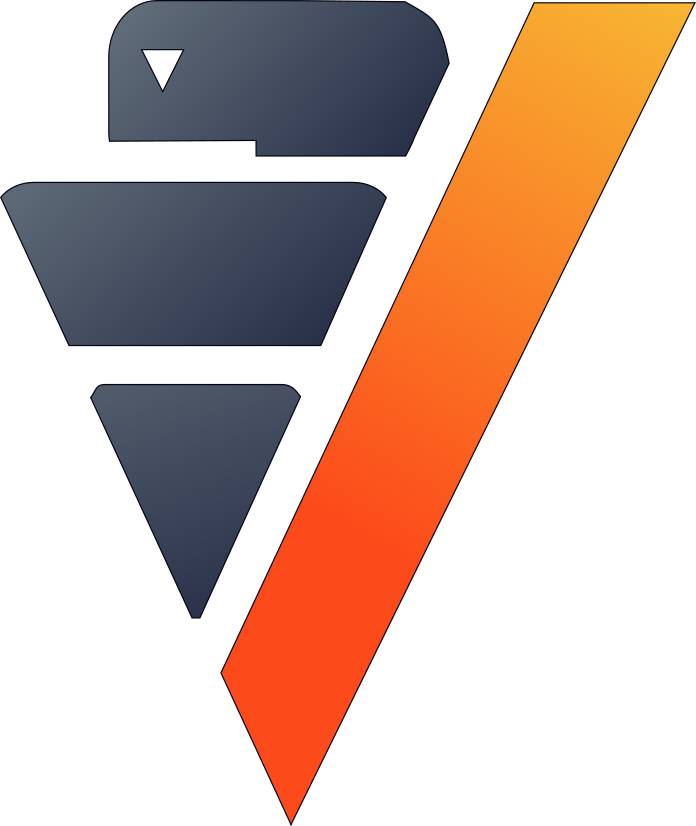

In [7]:
# discretize the age using a bin of 5
data["age"].discretize(method = "same_width", h = 5)

Age probably influences one's body mass index (BMI), so let's compare the average of body mass indexes of each age group and look for patterns there. We'll use a bar graph this time.

In [8]:
# average of BMI for each age group
data.bar(["age"], 
            method = "mean",
            of = "bmi",
)

There's a pretty clear trend here, and we can say that, in general, older individuals tend to have a greater BMIs.

Let's check the average number of smokers for each age-group. Before we do, we'll convert the 'yes' and 'no' 'smoker' values to more convenient boolean values.

In [9]:
# Importing the stats module
import verticapy.sql.functions as sf

# Applying the decode function
data["smoker_int"] = sf.decode(data["smoker"], True, 1, 0)

Now we can plot the average number of smokers for each age group.

In [10]:
# average of number of smokers per age group
data.bar(["age"], 
            method = "mean",
            of = "smoker_int",
)

Unfortuantely, there's no obvious relationship between age and smoking habits - none that we can find from this graph, anyway.

Let's see if we can relate an individual's smoking habits with their sex.

In [11]:
# average of number of smokers per sex
data.bar(["sex"], 
            method = "mean",
            of = "smoker_int",
)

Now we're getting somewhere! Looks like we have noticeably more male smokers than female ones.

Let's see how an individual's BMI relates to their sex.

In [12]:
# average bmi per sex
data.bar(["sex"], 
            method = "mean",
            of = "bmi",
)

Males seem to have a slightly higher BMI, but it'd be hard to draw any conclusions from such a small difference.

Going back to our earlier patterns, let's check the distribution of sexes among age groups and see if the patterns we identified earlier skews toward one of the sexes.

In [13]:
# pivot table with number of each sex per age group
data.pivot_table(['age','sex'])

It seems that sex is pretty evenly distributed in each age group.

Let's move onto costs: how much do people tend to spend on medical treatments?

In [14]:
data["charges"].hist(method = "count")

Based on this graph, the majority of insurance holders tend to spend less than 1500 and only a handful of people spend more than 5000.

## Encoding

Since our features vary in type, let's start by encoding our categorical features. Remember, we label-encoded 'smoker' from boolean. Let's label-encode some other features: sex, region, and age groups.

,123ageInteger,123sexInteger,123bmiNumeric(10),123childrenInteger,010smokerBoolean,123regionInteger,123chargesFloat(22),123smoker_intInteger
1,0,0,20.79,0,❌,2,1607.5101,0
2,0,0,21.66,0,✅,0,14283.4594,1
3,0,0,24.09,1,❌,2,2201.0971,0
4,0,0,25.08,0,❌,0,2196.4732,0
5,0,0,26.315,0,❌,0,2198.18985,0
6,0,0,26.73,0,❌,2,1615.7667,0
7,0,0,27.28,3,✅,2,18223.4512,1
8,0,0,28.215,0,❌,0,2200.83085,0
9,0,0,29.165,0,❌,0,7323.734819,0
10,0,0,30.115,0,❌,0,2203.47185,0

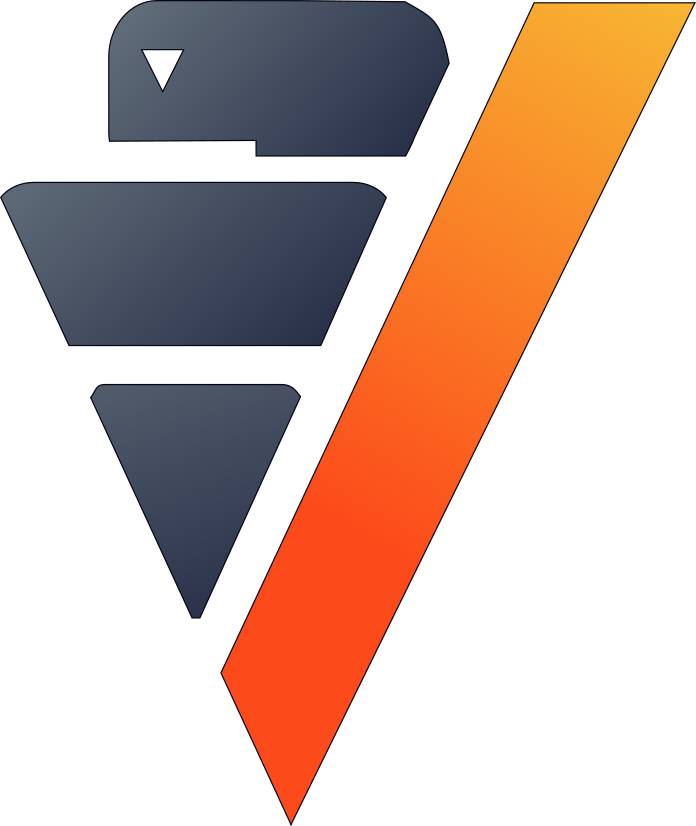

In [15]:
# encoding sex 
data["sex"].label_encode()

# encoding region
data["region"].label_encode()

# encoding age
data["age"].label_encode()

Before going further, let's check the correlation of the variables with the predictor 'charges'.

In [16]:
# find correlations with charges
data.corr(focus = 'charges')

,123ageInteger,123sexInteger,123bmiNumeric(10),123childrenInteger,010smokerBoolean,123regionInteger,123chargesFloat(22),123smoker_intInteger
1,0,0,20.79,0,❌,2,1607.5101,0
2,0,0,21.66,0,✅,0,14283.4594,1
3,0,0,24.09,1,❌,2,2201.0971,0
4,0,0,25.08,0,❌,0,2196.4732,0
5,0,0,26.315,0,❌,0,2198.18985,0
6,0,0,26.73,0,❌,2,1615.7667,0
7,0,0,27.28,3,✅,2,18223.4512,1
8,0,0,28.215,0,❌,0,2200.83085,0
9,0,0,29.165,0,❌,0,7323.734819,0
10,0,0,30.115,0,❌,0,2203.47185,0

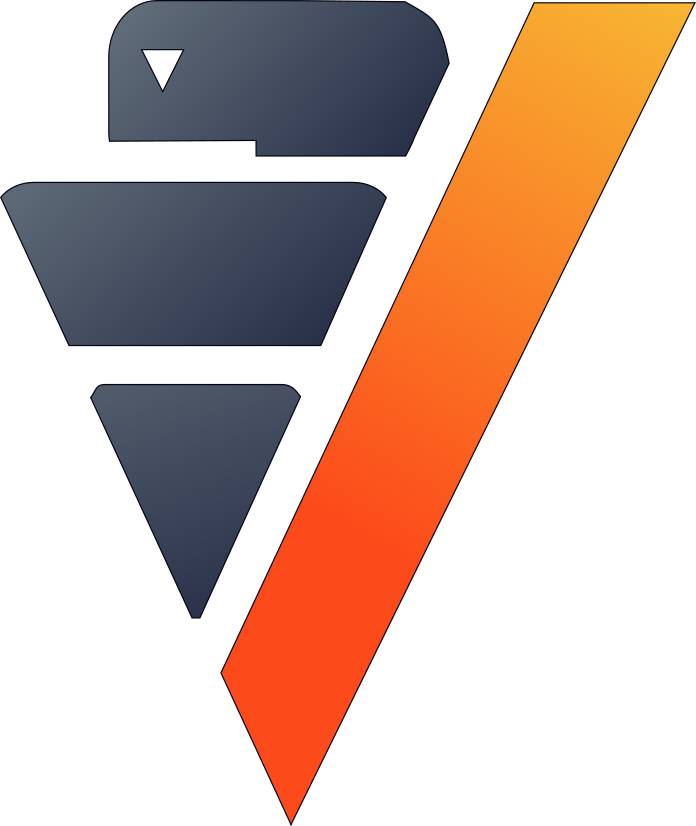

In [17]:
# save our modified dataset to the database
data.to_db("insurance.final_ins_data", relation_type = "table")

## Predicting insurance charges

Since our response variable is continuous, we can use regression to predict it. For this example, let's use a random forest model.

In [18]:
from verticapy.machine_learning.vertica.ensemble import RandomForestRegressor
# define the random forest model
rf_model = RandomForestRegressor(n_estimators = 20,
                                 max_features = "auto",
                                 max_leaf_nodes = 32, 
                                 sample = 0.7,
                                 max_depth = 3,
                                 min_samples_leaf = 5,
                                 min_info_gain = 0.0,
                                 nbins = 32)
# train the model
rf_model.fit(
    data,
    X = ["age", "sex", "bmi", "children", "smoker", "region"], 
    y = "charges")

/opt/venv/lib/python3.10/site-packages/vertica_python/vertica/connection.py:693: UserWarning: WARNING 8414: max_depth is set to 3 while max_breadth to 32. This means the size of trees may become limited by max_depth first
  warnings.warn(notice)




call_string
SELECT rf_regressor('"public"."_verticapy_tmp_randomforestregressor_v_demo_e0f6d6eabb4211ee9b0f0242ac120002_"', '"public"."_verticapy_tmp_view_v_demo_e0fd5d3abb4211ee9b0f0242ac120002_"', 'charges', '"age", "sex", "bmi", "children", "smoker", "region"' USING PARAMETERS exclude_columns='', ntree=20, mtry=3, sampling_size=0.7, max_depth=3, max_breadth=32, min_leaf_size=5, min_info_gain=0, nbins=32);

details
predictor|      type      
---------+----------------
   age   |      int       
   sex   |      int       
   bmi   |float or numeric
children |      int       
 smoker  |      bool      
 region  |      int       


Additional Info
       Name       |Value
------------------+-----
    tree_count    | 20  
rejected_row_count|  0  
accepted_row_count|1338 



We can create a regression report to check our model's performance.

,value
explained_variance,0.834663347875378
max_error,24108.8900514848
median_absolute_error,2341.9669507155
mean_absolute_error,3252.06578006027
mean_squared_error,24229092.6833866
root_mean_squared_error,4922.30562677558
r2,0.83466196753933
r2_adj,0.833916642073692
aic,22764.2583912055
bic,22800.4930151535

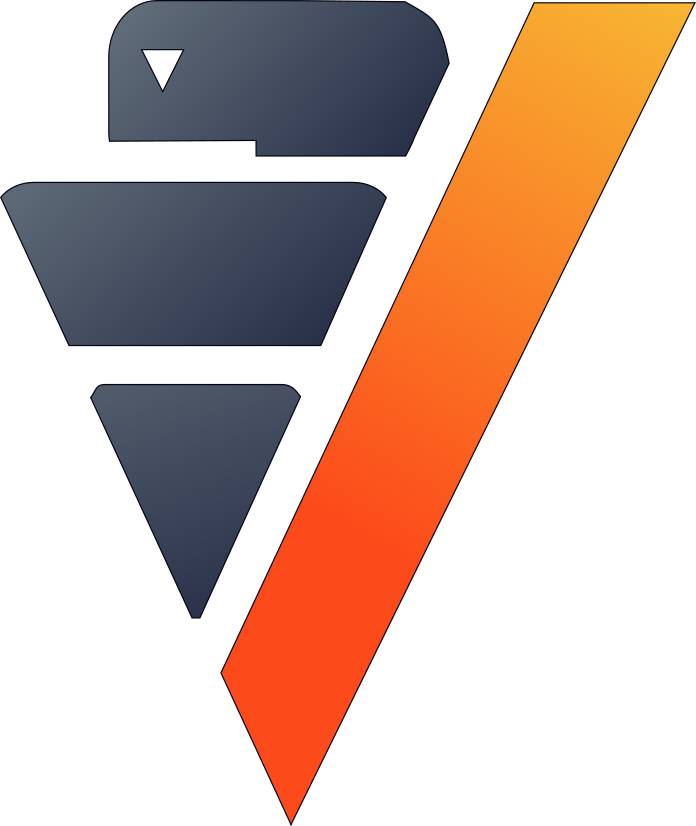

In [19]:
# regression report for the model
rf_model.report()

The results seem to be quite good! We have an explained variance around 0.8. Let's plot the predicted values and compare them to the real ones.

In [20]:
# plot the predicted values and real ones
result = rf_model.predict(data, 
                          name = "pred_charges")

# add an index
result["id"] = "ROW_NUMBER() OVER()"


# plot them along the id
result.plot(ts = 'id',
            columns = ['charges', 'pred_charges'])

Now, let's examine the importance of each feature for this model. Ours is a random forest model, so we can use the built-in Vertica function RF_PREDICTOR_IMPORTANCE() to calculate the importance of each predictor with Mean Decrease in Impurity (MDI).

In [21]:
# feature importance for our random forest model
rf_model.features_importance()

,importance,sign
smoker,78.84,1.0
bmi,11.42,1.0
age,9.01,1.0
children,0.39,1.0
sex,0.18,1.0
region,0.17,1.0

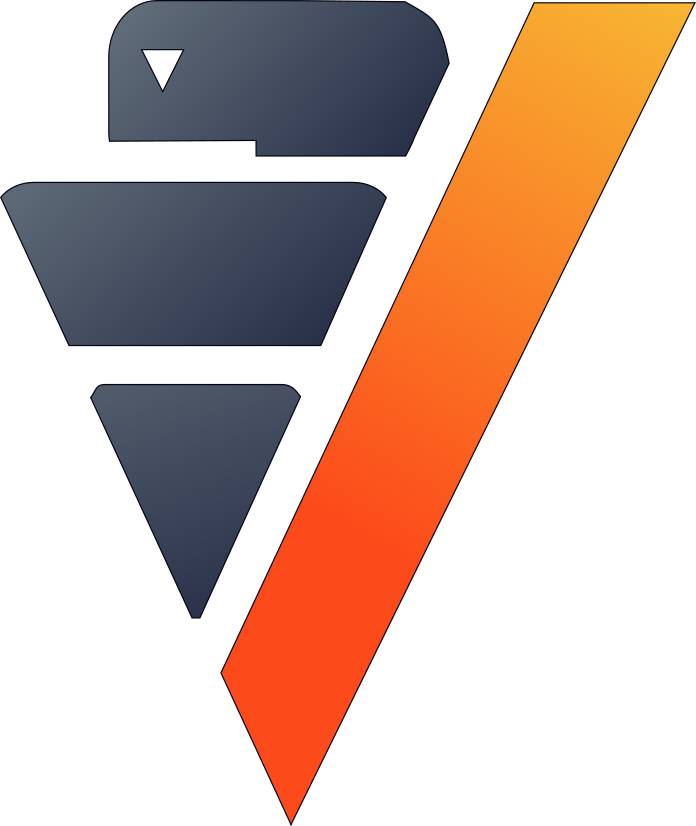

In [37]:
rf_model.features_importance(show = False)

We can examine how our model works by visualizing one of the trees in our random forest.

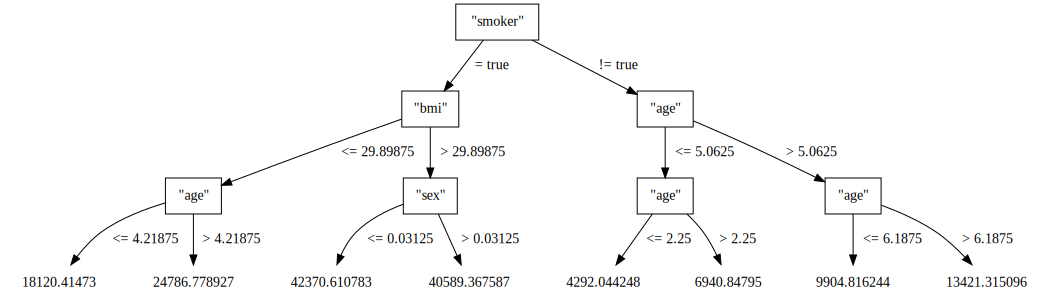

In [38]:
# plot one of the trees comprising the forest
rf_model.plot_tree(tree_id = 3)

## What affects medical costs?

We have a couple ways to approach this question. First, let's see what features are linearly correlated with the cost.

It seems that smoking habits have a significant effect on medical costs. Next in line comes BMI, the number of dependents, and sex.

As one might expect, the correlation between charges and region is almost 0.

Now, let's see what we can learn from a stepwise model with forward elimination using Bayesian information criterion (BIC) as a selection criteria.

Starting Stepwise


  0%|          | 0/6 [00:00<?, ?it/s]

[Model 0] bic: 25165.382614983; Variables: []
[Model 1] bic: 23878.7819623227; (+) Variable: "smoker"
[Model 2] bic: 23476.6177198522; (+) Variable: "age"
[Model 3] bic: 23352.9575311945; (+) Variable: "bmi"
[Model 4] bic: 23349.1352020944; (+) Variable: "children"
Selected Model

[Model 4] bic: 23349.1352020944; Variables: ['"smoker"', '"age"', '"bmi"', '"children"']


,,bic,change,variable,importance
0,,25165.382614983,[null],[null],0.0
1,,23878.7819623227,+,"""smoker""",70.8384024957294
2,,23476.6177198522,+,"""age""",22.142591346125677
3,,23352.9575311945,+,"""bmi""",6.80855415292928
4,,23349.1352020944,+,"""children""",0.2104520052156456
5,,23356.1509042434,-,"""sex""",0.0
6,,23351.0907040661,-,"""region""",0.0

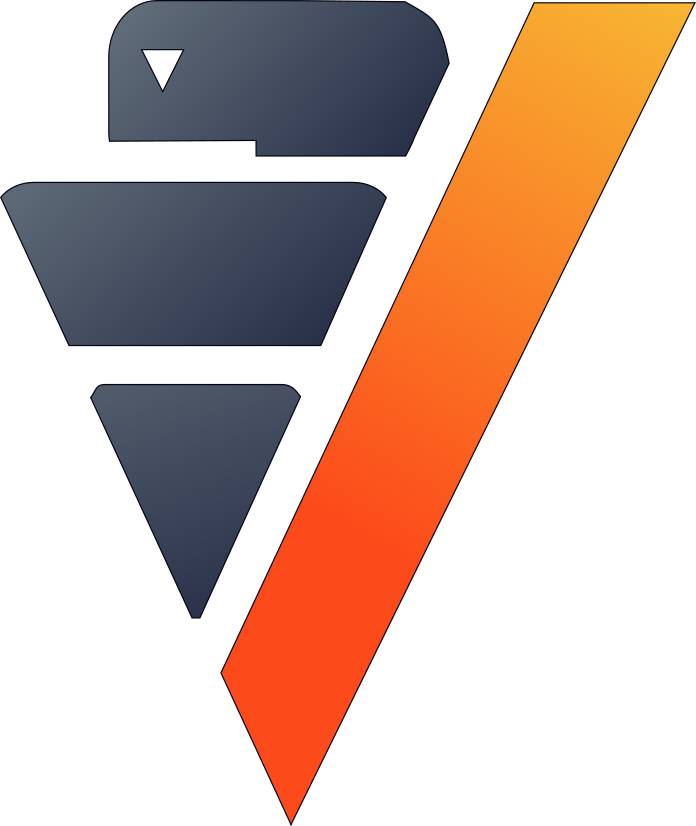

In [39]:
from verticapy.machine_learning.vertica.linear_model import LinearRegression
model = LinearRegression()

# backward
from verticapy.machine_learning.model_selection import stepwise
stepwise(model,
         input_relation = data, 
         direction = "forward",
         X = ["age","sex", "bmi", "children", "smoker", "region"], 
         y = "charges",)

From here we see that, again, the same features have similarly significant effects on medical costs.

### Conclusion

In this example, we used several methods to identify the primary factors that affect one's insurance costs.